In [1]:
import pandas as pd 
import numpy as np
from table_evaluator import TableEvaluator
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


IPython not installed.


# Load Sample Data

In [2]:
from sklearn.datasets import load_wine
data = load_wine()

In [3]:
y = data.target
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Normalize data to be at 0-1 range

Note: Data should be normalize, otherwise edit the activation function of last layer in the Generator

In [4]:
for col in X.columns:
    scaler = MinMaxScaler()
    old_data = np.expand_dims(np.asarray(X[col]), axis=-1)
    new_data = scaler.fit_transform(old_data)
    X[col] = new_data.flatten()


# Load WCGAN-GP class

In [5]:
from WCGAN_GP import WCGANGP

In [6]:
wcgan = WCGANGP(np.asarray(X), 
                y, 
                latent_dim=8, 
                batch_size=64, 
                n_critic=5,
                )

Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0 

In [7]:
wcgan.train(epochs=50)

0it [00:00, ?it/s]2023-06-08 12:45:46.158383: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-08 12:45:46.192755: W tensorflow/c/c_api.cc:291] Operation '{name:'training/Adam/dense_5/bias/v/Assign' id:1605 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_5/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_5/bias/v, training/Adam/dense_5/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-08 12:45:46.938155: W tensorflow/c/c_api.cc:291] Operation '{name:'Generator_2/Generator/batch_normalization_2/cond_3/Identity' id:1080 op device:{requested: '', assigned: ''} def:{{{node Generator_2/Generator/batch_normalization_2/cond_3/Identity}} = Ident

Epoch: 1/50 critic_loss: 7.9220 generator_loss: 0.0222


2it [00:00, 37.54it/s]


Epoch: 2/50 critic_loss: 1.2290 generator_loss: 0.1196


2it [00:00, 33.78it/s]


Epoch: 3/50 critic_loss: -0.0365 generator_loss: 0.1485


2it [00:00, 36.76it/s]


Epoch: 4/50 critic_loss: -0.3139 generator_loss: 0.1000


2it [00:00, 34.85it/s]


Epoch: 5/50 critic_loss: -0.3497 generator_loss: 0.0683


2it [00:00, 26.42it/s]


Epoch: 6/50 critic_loss: -0.3669 generator_loss: 0.1365


2it [00:00, 12.38it/s]


Epoch: 7/50 critic_loss: -0.3426 generator_loss: 0.0382


2it [00:00, 21.40it/s]


Epoch: 8/50 critic_loss: -0.4039 generator_loss: 0.0896


2it [00:00, 27.48it/s]


Epoch: 9/50 critic_loss: -0.3975 generator_loss: 0.0262


2it [00:00, 32.49it/s]


Epoch: 10/50 critic_loss: -0.4489 generator_loss: 0.0382


2it [00:00, 28.89it/s]


Epoch: 11/50 critic_loss: -0.3832 generator_loss: 0.0581


2it [00:00, 26.59it/s]


Epoch: 12/50 critic_loss: -0.4699 generator_loss: -0.0417


2it [00:00, 25.86it/s]


Epoch: 13/50 critic_loss: -0.4515 generator_loss: 0.0426


2it [00:00, 25.13it/s]


Epoch: 14/50 critic_loss: -0.4831 generator_loss: -0.0539


2it [00:00, 24.48it/s]


Epoch: 15/50 critic_loss: -0.4664 generator_loss: 0.0458


2it [00:00, 21.09it/s]


Epoch: 16/50 critic_loss: -0.4254 generator_loss: 0.0510


2it [00:00, 22.03it/s]


Epoch: 17/50 critic_loss: -0.3957 generator_loss: 0.0209


2it [00:00, 21.32it/s]


Epoch: 18/50 critic_loss: -0.4634 generator_loss: -0.0373


2it [00:00, 21.91it/s]


Epoch: 19/50 critic_loss: -0.4530 generator_loss: -0.0085


2it [00:00, 23.36it/s]


Epoch: 20/50 critic_loss: -0.4098 generator_loss: 0.0418


2it [00:00, 17.23it/s]


Epoch: 21/50 critic_loss: -0.4955 generator_loss: 0.0661


2it [00:00, 25.13it/s]


Epoch: 22/50 critic_loss: -0.4694 generator_loss: -0.0266


2it [00:00, 23.18it/s]


Epoch: 23/50 critic_loss: -0.4921 generator_loss: 0.0887


2it [00:00, 23.55it/s]


Epoch: 24/50 critic_loss: -0.4815 generator_loss: 0.1029


2it [00:00, 22.75it/s]


Epoch: 25/50 critic_loss: -0.4519 generator_loss: 0.1394


2it [00:00, 19.73it/s]


Epoch: 26/50 critic_loss: -0.4975 generator_loss: 0.0174


2it [00:00, 18.41it/s]


Epoch: 27/50 critic_loss: -0.4324 generator_loss: 0.0989


2it [00:00, 20.72it/s]


Epoch: 28/50 critic_loss: -0.4764 generator_loss: -0.0282


2it [00:00, 19.04it/s]


Epoch: 29/50 critic_loss: -0.5180 generator_loss: -0.0802


2it [00:00, 22.38it/s]


Epoch: 30/50 critic_loss: -0.4754 generator_loss: -0.1367


2it [00:00, 21.11it/s]


Epoch: 31/50 critic_loss: -0.5039 generator_loss: -0.2011


2it [00:00, 17.58it/s]


Epoch: 32/50 critic_loss: -0.4883 generator_loss: -0.0401


2it [00:00, 26.08it/s]


Epoch: 33/50 critic_loss: -0.5046 generator_loss: -0.0531


2it [00:00, 24.68it/s]


Epoch: 34/50 critic_loss: -0.4588 generator_loss: -0.2233


2it [00:00, 16.89it/s]


Epoch: 35/50 critic_loss: -0.4742 generator_loss: -0.0884


2it [00:00, 17.32it/s]


Epoch: 36/50 critic_loss: -0.4991 generator_loss: -0.1189


2it [00:00, 22.19it/s]


Epoch: 37/50 critic_loss: -0.4932 generator_loss: -0.1994


2it [00:00, 23.34it/s]


Epoch: 38/50 critic_loss: -0.4828 generator_loss: -0.2850


2it [00:00, 23.47it/s]


Epoch: 39/50 critic_loss: -0.4588 generator_loss: -0.3042


2it [00:00, 25.97it/s]


Epoch: 40/50 critic_loss: -0.4681 generator_loss: -0.2161


2it [00:00, 24.55it/s]


Epoch: 41/50 critic_loss: -0.5102 generator_loss: -0.2209


2it [00:00, 21.59it/s]


Epoch: 42/50 critic_loss: -0.5297 generator_loss: -0.2193


2it [00:00, 14.94it/s]


Epoch: 43/50 critic_loss: -0.4933 generator_loss: -0.2397


2it [00:00, 23.38it/s]


Epoch: 44/50 critic_loss: -0.5179 generator_loss: -0.1519


2it [00:00, 20.14it/s]


Epoch: 45/50 critic_loss: -0.4222 generator_loss: -0.2645


2it [00:00, 22.39it/s]


Epoch: 46/50 critic_loss: -0.5456 generator_loss: -0.2414


2it [00:00, 18.44it/s]


Epoch: 47/50 critic_loss: -0.4765 generator_loss: -0.2244


2it [00:00, 15.77it/s]


Epoch: 48/50 critic_loss: -0.5299 generator_loss: -0.0487


2it [00:00, 17.68it/s]


Epoch: 49/50 critic_loss: -0.4927 generator_loss: -0.2953


2it [00:00, 19.58it/s]

Epoch: 50/50 critic_loss: -0.5400 generator_loss: -0.2495


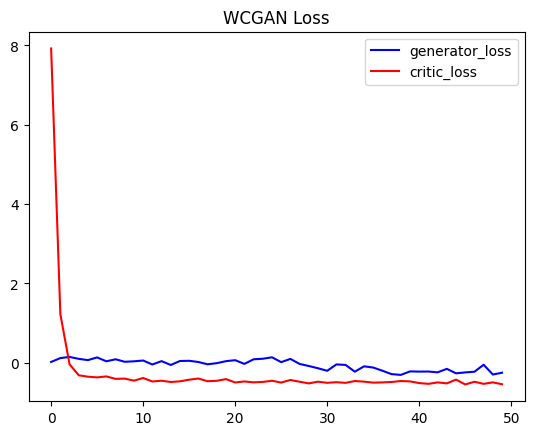

In [8]:
wcgan.plot_history()

In [9]:
generated_data, generated_label = wcgan.generate_data(X.shape[0])

/Users/mdaniyalk/miniforge3/lib/python3.10/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-06-08 12:45:52.241271: W tensorflow/c/c_api.cc:291] Operation '{name:'Generator/dense_3/Sigmoid' id:460 op device:{requested: '', assigned: ''} def:{{{node Generator/dense_3/Sigmoid}} = Sigmoid[T=DT_FLOAT, _has_manual_control_dependencies=true](Generator/dense_3/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [10]:
fake_samples = pd.DataFrame(generated_data)
fake_samples.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.247741,0.302629,0.618926,0.409127,0.285005,0.241900,0.388286,0.397760,0.326541,0.176707,0.505683,0.543289,0.271647
1,0.235494,0.238280,0.675995,0.404770,0.281728,0.251682,0.387463,0.402181,0.335603,0.179376,0.536991,0.551063,0.257108
2,0.209400,0.246937,0.650004,0.410227,0.261666,0.222151,0.368394,0.414325,0.319224,0.159257,0.525874,0.530705,0.227049
3,0.260790,0.320382,0.626324,0.403413,0.307699,0.268048,0.389239,0.399172,0.342415,0.192156,0.500336,0.554622,0.285658
4,0.226763,0.285392,0.648909,0.416394,0.286430,0.229880,0.379843,0.399404,0.327679,0.166238,0.519190,0.540065,0.246402


In [11]:
real_samples = pd.DataFrame(X)
real_samples.columns = np.arange(X.shape[1])
real_samples.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [12]:
table_evaluator = TableEvaluator(
    real_samples, 
    fake_samples
)

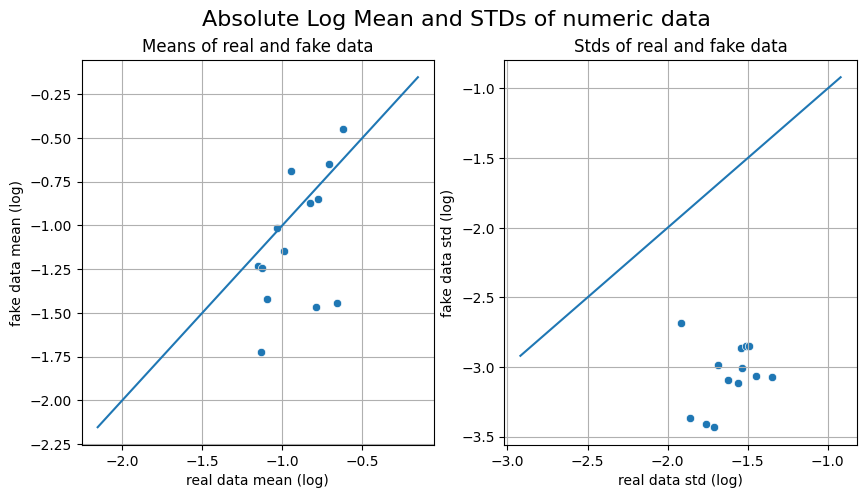

In [13]:
table_evaluator.plot_mean_std()

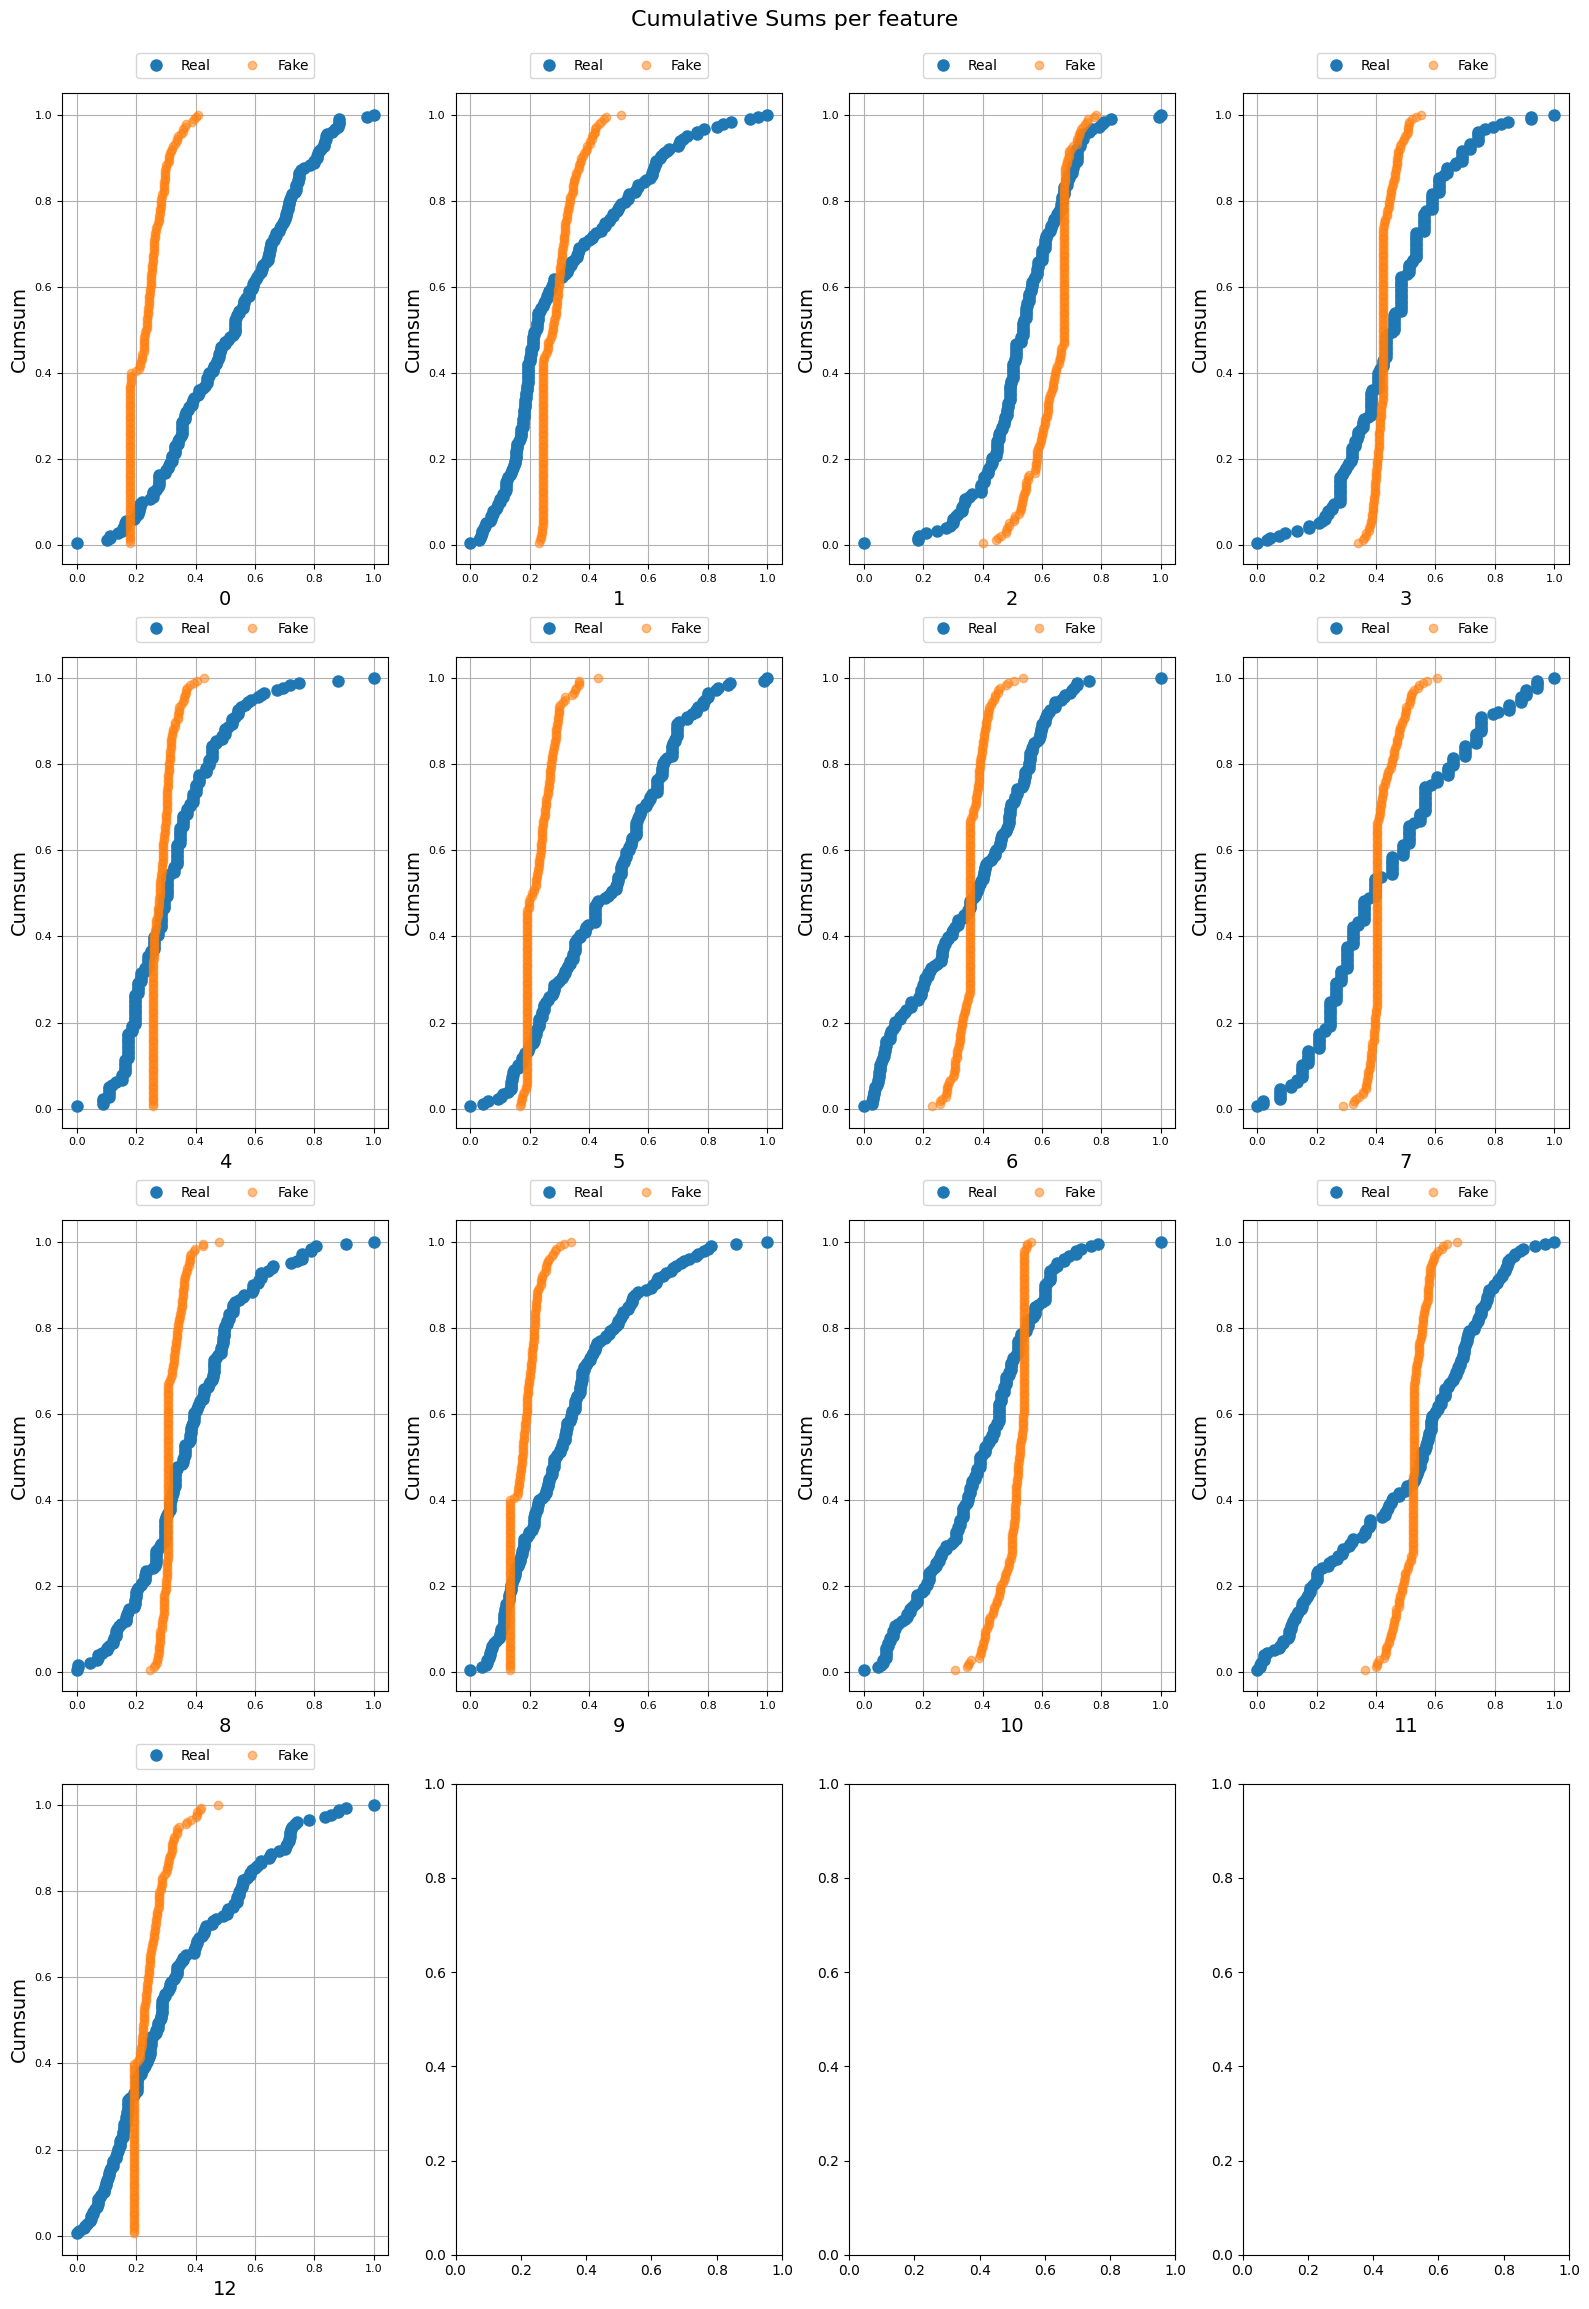

In [14]:
table_evaluator.plot_cumsums()

/Users/mdaniyalk/miniforge3/lib/python3.10/site-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/Users/mdaniyalk/miniforge3/lib/python3.10/site-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/Users/mdaniyalk/miniforge3/lib/python3.10/site-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.rea

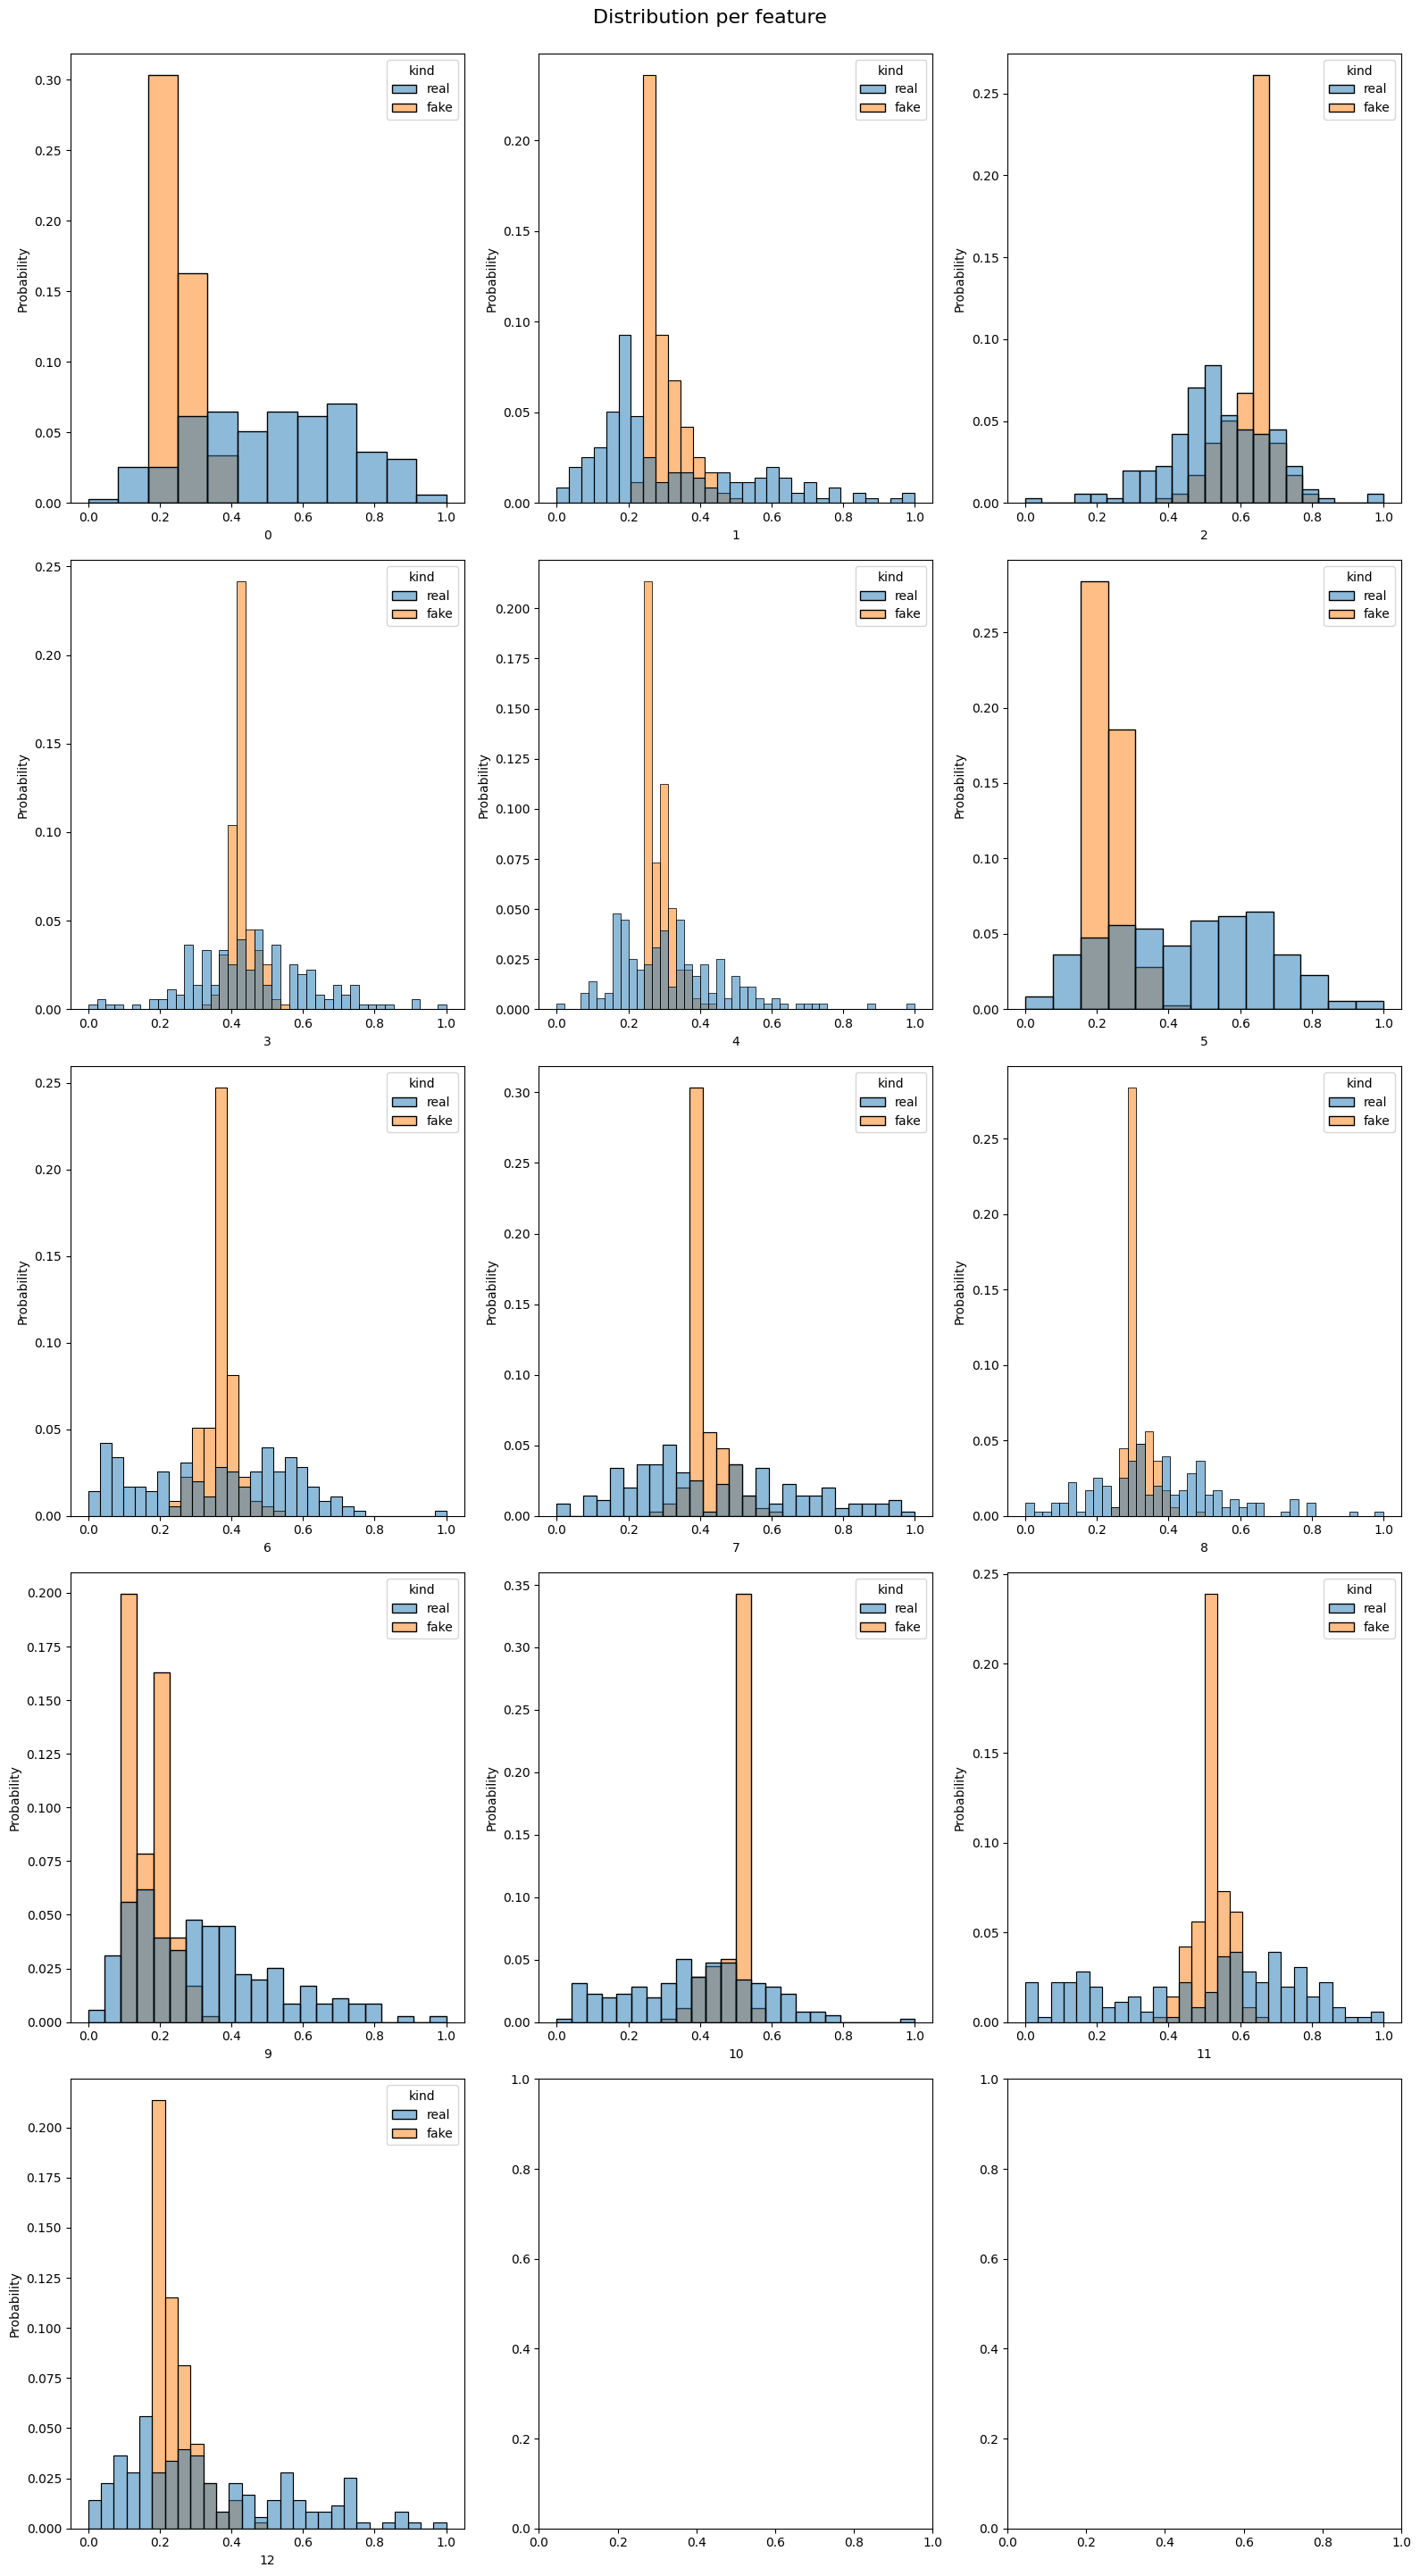

In [15]:
table_evaluator.plot_distributions()

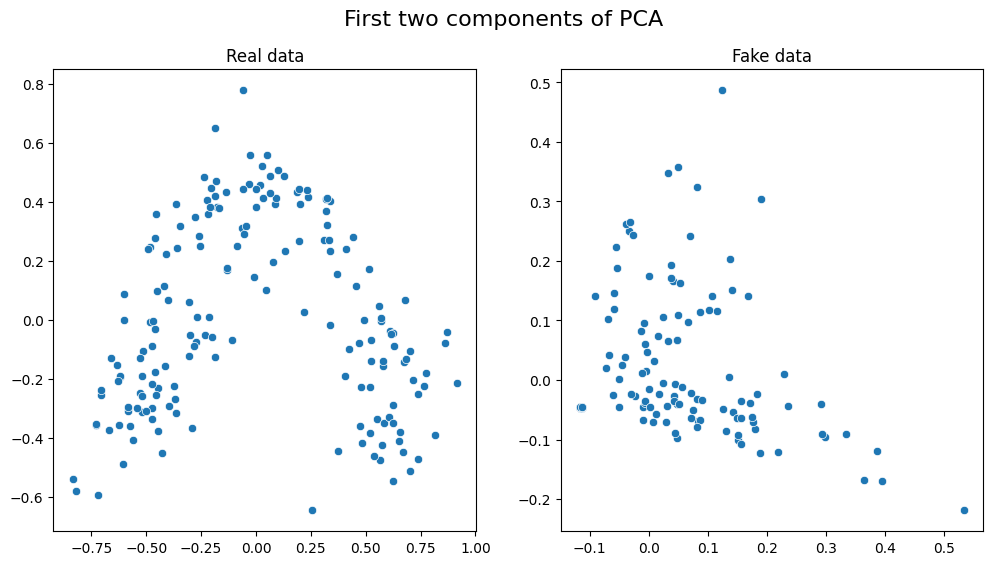

In [16]:
table_evaluator.plot_pca()